In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan.csv')
df.head(3)

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [4]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [5]:
df.duplicated().sum()

0

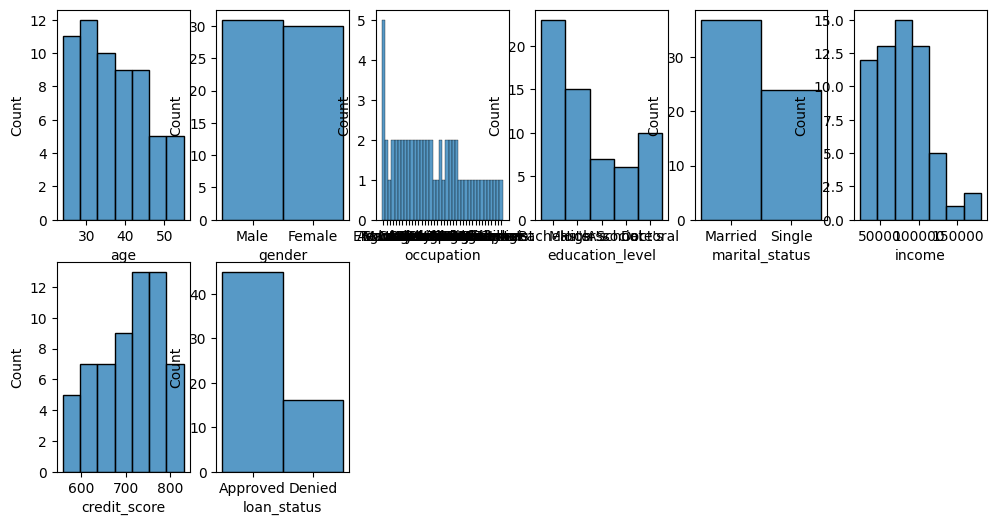

In [6]:
plt.figure(figsize = (12,6))
for i, col in enumerate(df.columns):
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = str(col), data = df)
plt.show()

In [7]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [8]:
df['loan_status'] = np.where(df['loan_status'] == 'Approved', 1, 0)

In [9]:
X = df.drop(['loan_status'], axis = 1)
y = df[['loan_status']]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.5+ KB


In [11]:
num_idx = X.columns[[0,5,6]]
num_idx = list(num_idx)

In [12]:
ob_idx = X.columns.difference(num_idx)
ob_idx = list(ob_idx)

In [13]:
print(num_idx) ; print(ob_idx)

['age', 'income', 'credit_score']
['education_level', 'gender', 'marital_status', 'occupation']


# 전처리

In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [15]:
education = LabelEncoder()
gender = LabelEncoder()
marital = LabelEncoder()
job = LabelEncoder()

X['education_level'] = education.fit_transform(X['education_level'])
X['gender'] = gender.fit_transform(X['gender'])
X['marital_status'] = marital.fit_transform(X['marital_status'])
X['occupation'] = job.fit_transform(X['occupation'])

In [16]:
for col in num_idx:
    mm = MinMaxScaler()
    X[col] = mm.fit_transform(X[col].values.reshape(-1,1))

In [17]:
X.head()

,age,gender,occupation,education_level,marital_status,income,credit_score
0,0.258065,1,12,1,0,0.387097,0.592593
1,0.677419,0,35,4,1,0.238710,0.444444
2,0.129032,1,33,3,1,0.000000,0.111111
3,0.870968,0,16,1,0,0.516129,0.814815
4,0.387097,1,0,1,0,0.322581,0.555556


In [18]:
print(education.classes_)
print(gender.classes_)
print(marital.classes_)
print(job.classes_)

["Associate's" "Bachelor's" 'Doctoral' 'High School' "Master's"]
['Female' 'Male']
['Married' 'Single']
['Accountant' 'Analyst' 'Architect' 'Artist' 'Banker' 'Chef' 'Consultant'
 'Dentist' 'Designer' 'Doctor' 'Editor' 'Electrician' 'Engineer' 'HR' 'IT'
 'Lawyer' 'Manager' 'Marketing' 'Musician' 'Nurse' 'Pharmacist'
 'Photographer' 'Pilot' 'Professor' 'Programmer' 'Psychologist' 'Realtor'
 'Receptionist' 'Researcher' 'Sales' 'Salesman' 'Server' 'Software'
 'Student' 'Stylist' 'Teacher' 'Veterinarian' 'Writer']


In [19]:
# education.transform(["Associate's" "Bachelor's" 'Doctoral' 'High School' "Master's"])
education.inverse_transform([0,1,2,3,4])

array(["Associate's", "Bachelor's", 'Doctoral', 'High School', "Master's"],
      dtype=object)

# 모델링

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(48, 7) (13, 7)
(48, 1) (13, 1)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, RocCurveDisplay, confusion_matrix

from sklearn.model_selection import GridSearchCV

In [22]:
models = {'DT': (DecisionTreeClassifier(),{'max_depth': range(2, 12, 3),
                                           'min_samples_split': [10, 50, 100, 300],
                                           'min_samples_leaf': range(1, 10, 3)
                                          }),
          'RF': (RandomForestClassifier(),{'n_estimators': range(50, 160, 50),
                                           'max_depth': range(2, 12, 3),
                                           'min_samples_split': [10, 50, 100, 300],
                                           'min_samples_leaf': range(1, 10, 3)
                                          }),
          'ET': (ExtraTreesClassifier(),{'n_estimators': range(50, 160, 50),
                                         'max_depth': range(2, 12, 3),
                                         'min_samples_split': [10, 50, 100, 300],
                                         'min_samples_leaf': range(1, 10, 3)
                                        }),
          'GB': (GradientBoostingClassifier(),{'n_estimators': range(50, 160, 50),
                                               'max_depth': range(2, 12, 3),
                                               'min_samples_split': [10, 50, 100, 300]
                                              }),
          'XGB': (XGBClassifier(),{'n_estimators': range(50, 160, 50),
                                   'max_depth': range(2, 12, 3),
                                   'learning_rate': [0.01, 0.1, 0.2],
                                   'min_child_weight': range(1, 10, 3)
                                  }),
          'LGBM': (LGBMClassifier(),{'n_estimators': range(50, 160, 50),
                                     'max_depth': range(2, 12, 3),
                                     'min_child_samples': [10, 50, 100, 300]
                                    })
         }

In [30]:
best_models = []
name = []
f1s = []
acc = []
pre = []
rec = []
roc = []
results = []

for model_name, (model, param_grid) in models.items():
#     gs = GridSearchCV(model, param_grid, n_jobs= -1, scoring = 'roc_auc')
#     gs.fit(X_train, y_train)
    
#     best_model = gs.best_estimator_
#     best_models.append(best_model)
    
    f1, accuracy, precision, recall, rocauc, cm = scoring(model, X_train, y_train, X_test, y_test)
    
    results.append((model_name, gs.best_score_))
    # best_models.append(best_model)
    name.append(model_name)
    f1s.append(f1)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    roc.append(rocauc)


collection = pd.DataFrame({'Algorithm': name,
                       'F1 Score': f1s,
                       'Accuracy': acc,
                       'Precision': pre,
                       'Recall': rec,
                       'ROC AUC': roc
                       })

print(results)
# print(best_models)
display(collection)

[('DT', 0.9857142857142858), ('RF', 0.9857142857142858), ('ET', 0.9857142857142858), ('GB', 0.9857142857142858), ('XGB', 0.9857142857142858), ('LGBM', 0.9857142857142858)]


,Algorithm,F1 Score,Accuracy,Precision,Recall,ROC AUC
0,DT,1.0,1.0,1.0,1.0,1.0
1,RF,1.0,1.0,1.0,1.0,1.0
2,ET,1.0,1.0,1.0,1.0,1.0
3,GB,1.0,1.0,1.0,1.0,1.0
4,XGB,1.0,1.0,1.0,1.0,1.0
5,LGBM,1.0,1.0,1.0,1.0,1.0


In [23]:
def scoring(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return f1, accuracy, precision, recall, rocauc, cm

In [29]:
best_models = []
name = []
f1s = []
acc = []
pre = []
rec = []
roc = []
results = []

for model_name, (model, param_grid) in models.items():
    gs = GridSearchCV(model, param_grid, n_jobs= -1, scoring = 'roc_auc')
    gs.fit(X_train, y_train)
    
    best_model = gs.best_estimator_
    best_models.append(best_model)
    
    f1, accuracy, precision, recall, rocauc, cm = scoring(best_model, X_train, y_train, X_test, y_test)
    
    results.append((model_name, gs.best_score_))
    best_models.append(best_model)
    name.append(model_name)
    f1s.append(f1)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    roc.append(rocauc)


collection = pd.DataFrame({'Algorithm': name,
                       'F1 Score': f1s,
                       'Accuracy': acc,
                       'Precision': pre,
                       'Recall': rec,
                       'ROC AUC': roc
                       })

print(results)
print(best_models)
display(collection)

/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: Dat

[('DT', 0.9857142857142858), ('RF', 1.0), ('ET', 1.0), ('GB', 0.9857142857142858), ('XGB', 1.0), ('LGBM', 0.9857142857142858)]
[DecisionTreeClassifier(max_depth=2, min_samples_split=10), DecisionTreeClassifier(max_depth=2, min_samples_split=10), RandomForestClassifier(max_depth=2, min_samples_split=10, n_estimators=50), RandomForestClassifier(max_depth=2, min_samples_split=10, n_estimators=50), ExtraTreesClassifier(max_depth=2, min_samples_split=10, n_estimators=50), ExtraTreesClassifier(max_depth=2, min_samples_split=10, n_estimators=50), GradientBoostingClassifier(max_depth=2, min_samples_split=10, n_estimators=50), GradientBoostingClassifier(max_depth=2, min_samples_split=10, n_estimators=50), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu

,Algorithm,F1 Score,Accuracy,Precision,Recall,ROC AUC
0,DT,1.0,1.0,1.0,1.0,1.0
1,RF,1.0,1.0,1.0,1.0,1.0
2,ET,1.0,1.0,1.0,1.0,1.0
3,GB,1.0,1.0,1.0,1.0,1.0
4,XGB,1.0,1.0,1.0,1.0,1.0
5,LGBM,1.0,1.0,1.0,1.0,1.0
